# Sensing Local Field Potentials with a Directional and Scalable Depth Array: the DISC electrode array
## Figure 1
- Associated data: F/B Ratio vs. Lead diameter
- Link: (nature excel link)

## Description:
#### This module performs simple calculations for computing front-to-back ratio and plotting the resulting voltage shown in Inset C for Figure 1.
- Input: ANSYS .csv output 
- Output: .eps file containing the plotted data from Fig. 1C

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data_path = '/home/jovyan/ansys_data/f-b-ratio-avg.csv'
image_save_path = '/home/jovyan/ansys_data/images/f-b-ratio-voltage.eps'

data=pd.read_csv(data_path)

## Process data

In [2]:
# Sigma = 10e-10
v_front = data.v_front
v_back = data.v_back
# Sigma = 0.2
v_front_br = data.v_front_brain
v_back_br = data.v_back_brain
lead_diam = data.r_l * 2

f_b_ratio = v_front / v_back #FB ratio will be what our device actually measures
f_b_ratio_br = v_front_br / v_back_br #Get FB ratio for only effect of electrodes moving apart
f_b_ratio_normal = f_b_ratio / f_b_ratio_br #Normalize normal FB ratio to only see effect of substrate shielding

## Plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

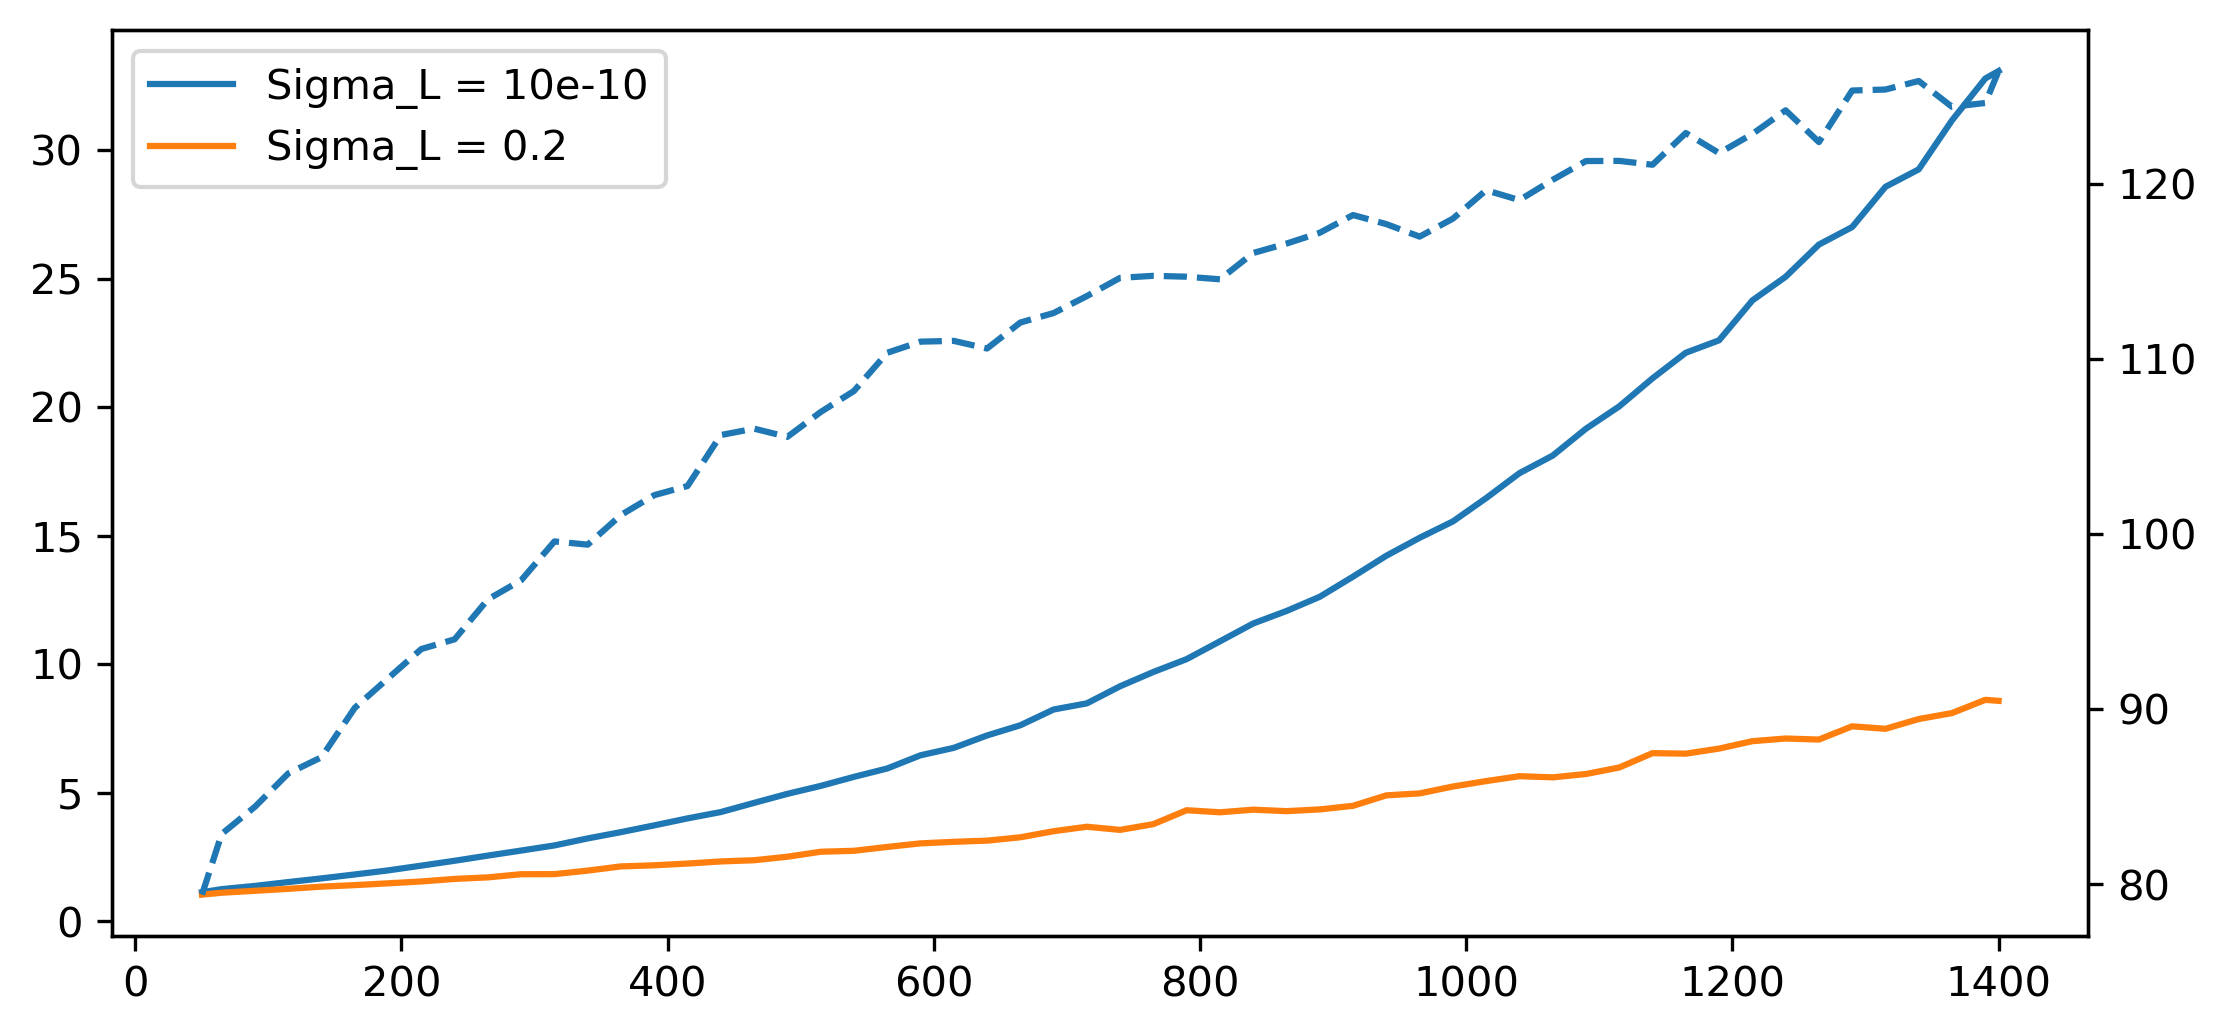

In [3]:
# First, clear old plot if one exists
plt.clf()
fig, ax1 = plt.subplots(figsize=[8.5, 4], dpi=300)
# Now, create figure & add plots to it
ax1.plot(lead_diam,f_b_ratio)
ax1.plot(lead_diam, f_b_ratio_br)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(lead_diam, v_front, linestyle='dashed')
ax1.legend(["Sigma_L = 10e-10", "Sigma_L = 0.2"])

fig.savefig(image_save_path, format='eps', dpi=300)
plt.show()